In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

routes = pd.read_csv('data/statuses/route_definitions.csv')

train = pd.read_csv('data/statuses/train_observations.csv')
train_availability = pd.read_csv('data/statuses/train_availability.csv')

test_1000 = pd.read_csv('data/statuses/test_observations_1000.csv')
test = pd.read_csv('data/statuses/test_observations.csv')

# training data
df = pd.merge(train, train_availability, on="observation_id")
df = pd.merge(df, routes, on='route_id')
df['timestamp_date'] = df.timestamp.str.split(' ').apply(lambda row: row[0])
df['timestamp_hour'] = df.timestamp.str.split(' ').apply(lambda row: row[1][:8])

train_data, val = train_test_split(df, train_size=.8, stratify=df['status'])
train_data.to_csv('data/statuses/train_data.csv', index=False)
val.to_csv('data/statuses/val_data.csv', index=False)

# test data
df = pd.merge(test, routes, on='route_id')
df['timestamp_date'] = df.timestamp.str.split(' ').apply(lambda row: row[0])
df['timestamp_hour'] = df.timestamp.str.split(' ').apply(lambda row: row[1][:8])
df.to_csv('data/statuses/test.csv', index=False)

# test 1000 data
df = pd.merge(test_1000, routes, on='route_id')
df['timestamp_date'] = df.timestamp.str.split(' ').apply(lambda row: row[0])
df['timestamp_hour'] = df.timestamp.str.split(' ').apply(lambda row: row[1][:8])
df.to_csv('data/statuses/test_1000.csv', index=False)

In [2]:
df.to_csv('data/statuses/test.csv', index=False)
df = pd.read_csv('data/statuses/train_data.csv')

In [11]:
df['timestamp_hour']

0        03:03:47
1        03:18:34
2        11:08:56
3        03:11:19
4        22:15:21
           ...   
51995    08:58:56
51996    03:13:35
51997    05:01:52
51998    17:52:41
51999    12:29:16
Name: timestamp_hour, Length: 52000, dtype: object

In [3]:
from datetime import datetime

df['timestamp_hour_1'] = '0'
for i in range(len(df['timestamp_hour_1'])):
    date_str = df['timestamp_hour'][i]
    df['timestamp_hour_1'][i]  = datetime.strptime(date_str, '%H-%M-%S').date().hour()

C:\Users\maaja\AppData\Local\Temp/ipykernel_43324/2349391705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp_weekday'][i]  = datetime.strptime(date_str, '%Y-%m-%d').date().weekday()


In [14]:
df["timestamp_date"] = pd.to_datetime(df["timestamp_date"])
df["dayoftheweek"]= df["timestamp_date"].dt.day_of_week

In [16]:
df["timestamp_hour"] = pd.to_datetime(df["timestamp_hour"])
df["hours"]= df["timestamp_hour"].dt.hour

In [20]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [21]:
df["timestamp_date"] = pd.to_datetime(df["timestamp_date"])
df["dayoftheweek"]= df["timestamp_date"].dt.day_of_week

df['season'] = df["timestamp_date"].map(season_of_date)

In [22]:
df.head()

,observation_id,route_id,timestamp,status,airport,route_type,waypoints,timestamp_date,timestamp_hour,timestamp_weekday,dayoftheweek,hours,season
0,62885,SUMMA2 SUMMA,2020-09-11 03:03:47+00:00,CLSD,KSEA,DEPARTURE,"[(47.449888888888886, -122.31177777777778), (4...",2020-09-11,2022-11-19 03:03:47,4,4,3,summer
1,45076,JEFPO1 JEFPO,2020-05-18 03:18:34+00:00,OPEN,KSEA,DEPARTURE,"[(47.449888888888886, -122.31177777777778), (4...",2020-05-18,2022-11-19 03:18:34,0,0,3,spring
2,18476,SEA7 SEA,2020-04-18 11:08:56+00:00,OPEN,KSEA,DEPARTURE,"[(47.449888888888886, -122.31177777777778), (4...",2020-04-18,2022-11-19 11:08:56,5,5,11,spring
3,64544,SUMMA2 SUMMA,2021-08-05 03:11:19+00:00,CLSD,KSEA,DEPARTURE,"[(47.449888888888886, -122.31177777777778), (4...",2021-08-05,2022-11-19 03:11:19,3,3,3,summer
4,39518,GREGS GIBBI2,2021-08-30 22:15:21+00:00,CLSD,KDFW,ARRIVAL,"[(33.450608333333335, -97.46605555555556), (33...",2021-08-30,2022-11-19 22:15:21,0,0,22,summer


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


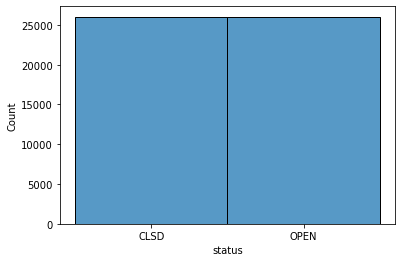

In [10]:
df.head(1)
sns.histplot(df['status'])
plt.show()

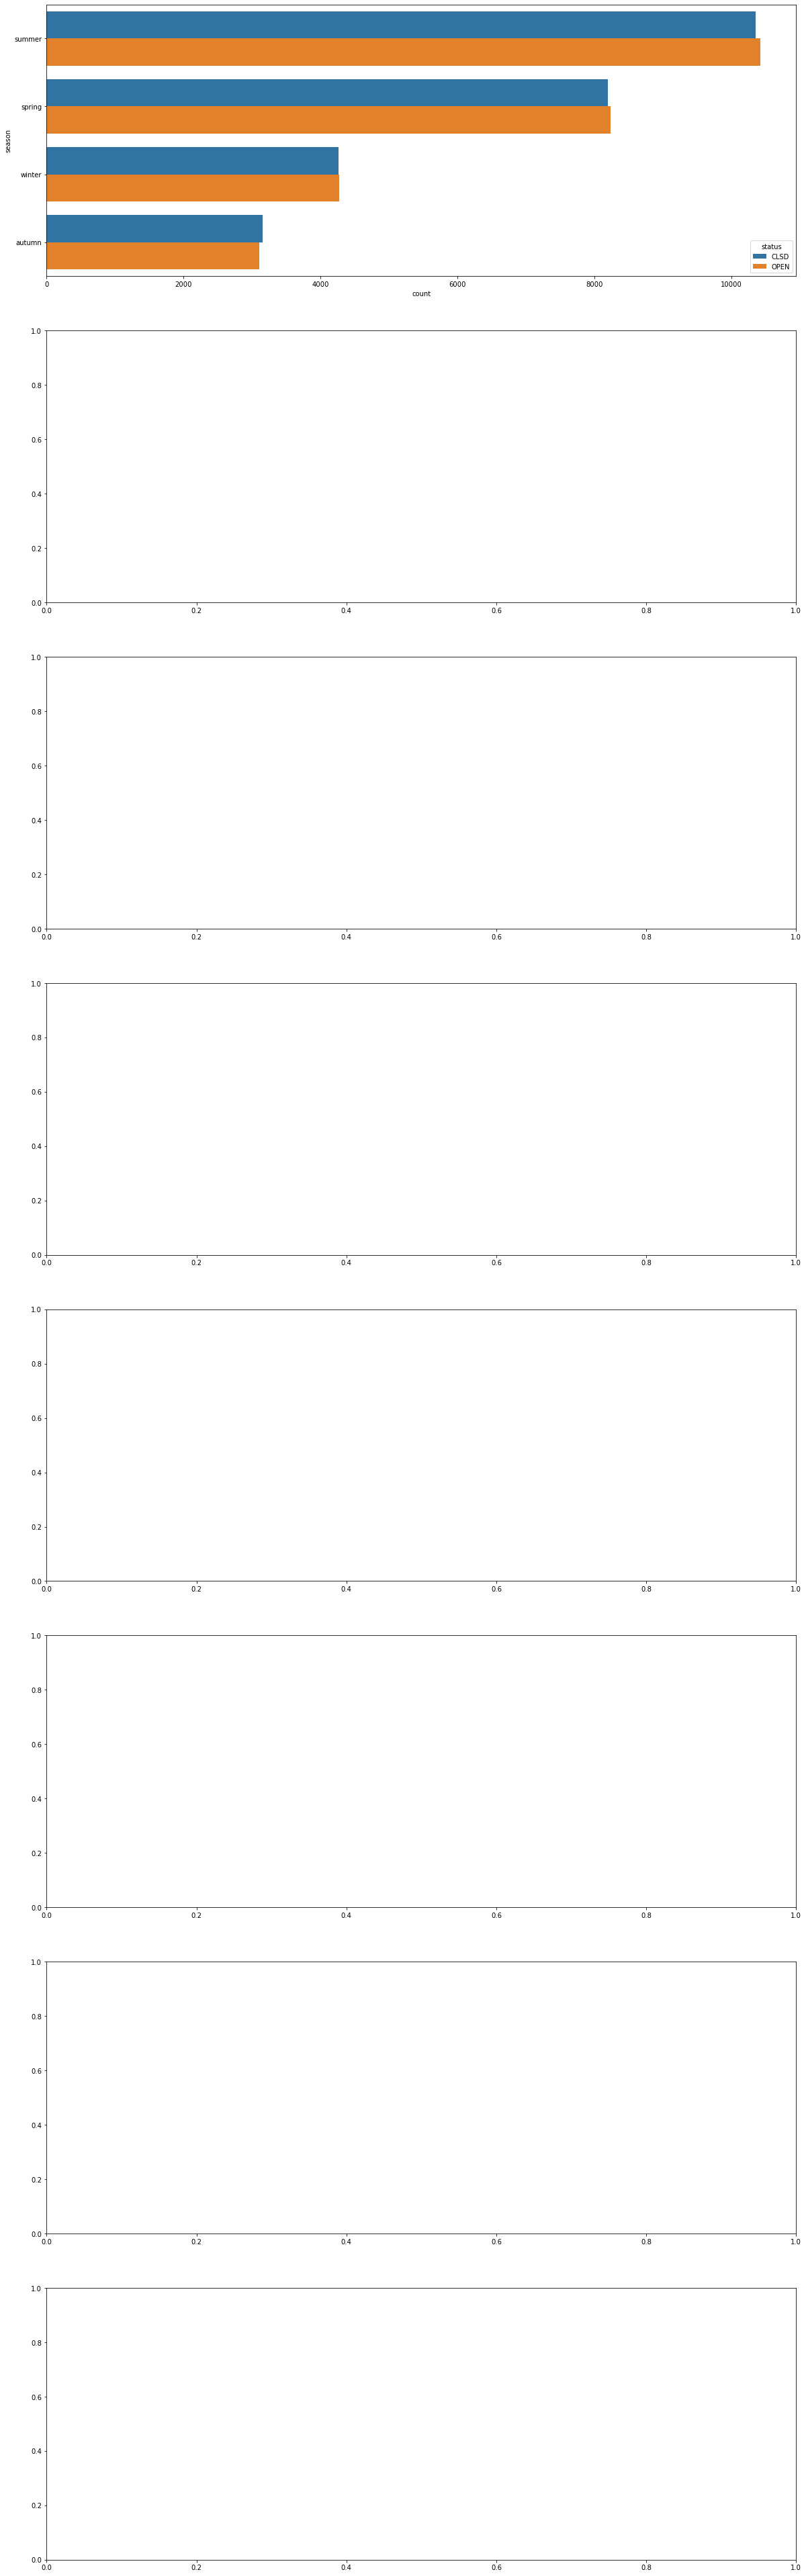

In [23]:
# categorical_columns = list(df.select_dtypes(exclude=[np.number]).columns)
# categorical_columns = [c for c in categorical_columns if c != 'status']
# categorical_columns = ["airport", "timestamp_weekday", "season"]
categorical_columns = ["season"]

r = 2
fig, axs = plt.subplots(8, figsize=(20,70))
i = 0
for col in categorical_columns:
    sns.countplot(data=df, hue=df['status'], y=col, ax = axs[i])
    i += 1
plt.show()

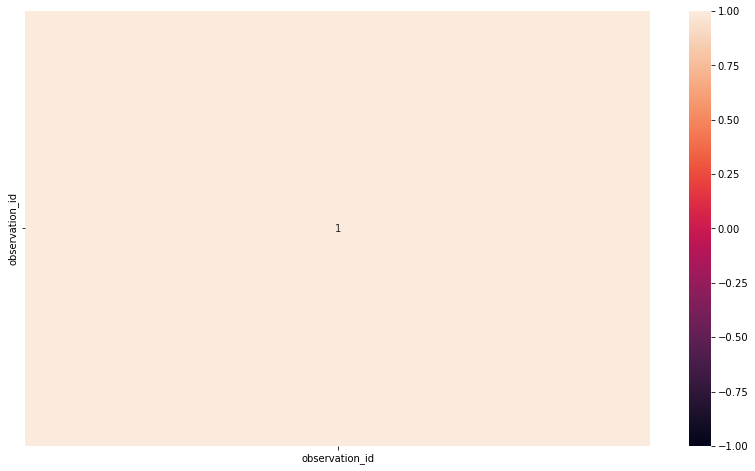

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),  annot=True, vmin=-1)
plt.show()

In [25]:
from datetime import date

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-01-01', end='2014-12-31').to_pydatetime()
if datetime.datetime(2014,01,01) in holidays:
    print True 

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (Temp/ipykernel_43324/2468315059.py, line 6)